## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [40]:
df = pd.read_csv('dec_2019_delay_data.csv')
df

,fl_date,dep_delay
0,2019-12-01,39
1,2019-12-01,22
2,2019-12-01,-3
3,2019-12-01,2
4,2019-12-01,18
...,...,...
673124,2019-12-31,15
673125,2019-12-31,48
673126,2019-12-31,-5
673127,2019-12-31,1


In [64]:
df.describe()

,dep_delay
count,673129.000000
mean,12.465559
std,51.565875
min,-49.000000
25%,-5.000000
50%,-2.000000
75%,9.000000
max,2710.000000


In [65]:
df['dep_delay'].median()

-2.0

In [41]:
df.isnull().sum()

fl_date      0
dep_delay    0
dtype: int64

In [53]:
dep_delay = df.drop(df[df['dep_delay']>400].index)
dep_delay.head()

,fl_date,dep_delay
0,2019-12-01,39
1,2019-12-01,22
2,2019-12-01,-3
3,2019-12-01,2
4,2019-12-01,18


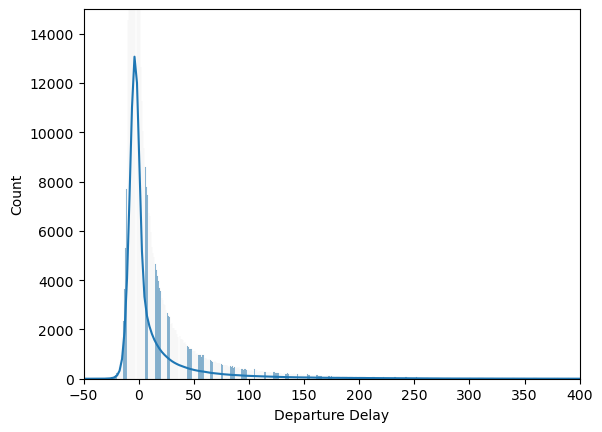

In [48]:
sns.histplot(dep_delay['dep_delay'], kde=True)

# Set the axis limits and labels
plt.xlim(-50, 400)
plt.ylim(0, 15000)
plt.xlabel("Departure Delay")
plt.ylabel("Count")

# Show the plot
plt.show()

Descriptive statistics of the scaled data:
                   0
count  6.715430e+05
mean  -1.205565e-14
std    1.000001e+00
min   -1.610176e+00
25%   -4.263454e-01
50%   -3.456297e-01
75%   -4.967210e-02
max    1.047028e+01
Median of the scaled data:
 0   -0.34563
dtype: float64


<AxesSubplot:ylabel='Count'>

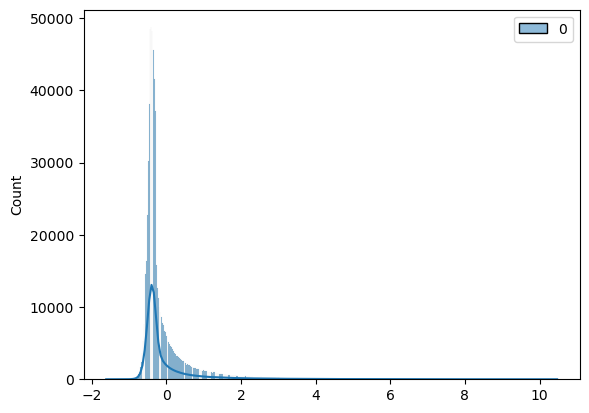

In [71]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Transform the data
scaled_delay = scaler.fit_transform(dep_delay['dep_delay'].values.reshape(-1, 1))

# Convert the scaled data to a DataFrame
scaled_delay = pd.DataFrame(scaled_delay)


# Get the descriptive statistics of the scaled data
desc_stats = scaled_delay.describe()
median = scaled_delay.median()
print("Descriptive statistics of the scaled data:\n", desc_stats)
print("Median of the scaled data:\n", median)

# Create a histogram of the scaled data
sns.histplot(scaled_delay, kde=True)



#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [93]:
df = pd.read_csv('monthly_average_delay.csv')
df.head()

,year,month,avg_departure_delay,avg_arrival_delay,flights_per_month
0,2018,1,9.66,3.19,600720
1,2018,2,9.77,4.15,556050
2,2018,3,7.66,2.13,646045
3,2018,4,8.35,3.61,641490
4,2018,5,10.72,5.99,663029


In [94]:
df.sort_values(['flights_per_month'],ascending=False).head(10)

,year,month,avg_departure_delay,avg_arrival_delay,flights_per_month
19,2019,8,12.70,7.75,705249
18,2019,7,14.23,8.97,703717
6,2018,7,13.44,9.00,689108
7,2018,8,13.96,10.10,687153
21,2019,10,7.99,2.65,687120
16,2019,5,11.99,7.03,680766
17,2019,6,16.00,11.99,680459
14,2019,3,9.15,3.49,675943
23,2019,12,12.47,6.44,673129
5,2018,6,13.25,8.83,669405


Text(0.5, 1.0, 'Flight Departure Delay per Month')

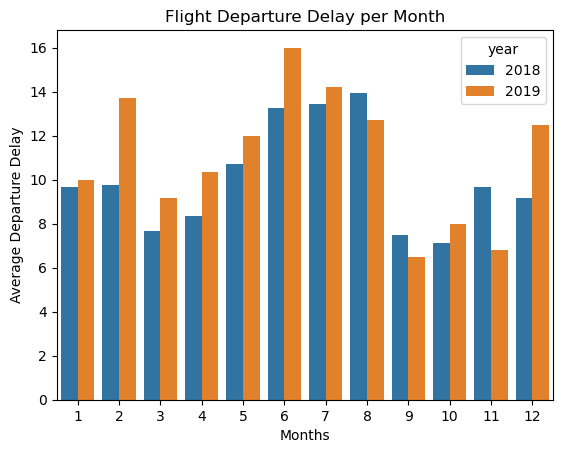

In [96]:
sns.barplot(data=df, x='month', y='avg_departure_delay', hue='year')
 
# labels for x & y axis
plt.xlabel('Months')
plt.ylabel('Average Departure Delay')
 
# title of plot
plt.title('Flight Departure Delay per Month')

Text(0.5, 1.0, 'Flight Arrival Delay per Month')

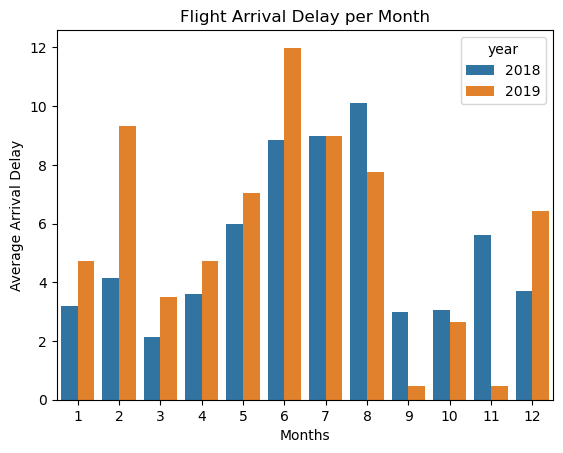

In [98]:
sns.barplot(data=df, x='month', y='avg_arrival_delay', hue='year')
 
# labels for x & y axis
plt.xlabel('Months')
plt.ylabel('Average Arrival Delay')
 
# title of plot
plt.title('Flight Arrival Delay per Month')

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [99]:
df = pd.read_csv('time_in_air.csv')
df

,flight_outcome,no_of_flights,percent_breakdown,avg_time_saved_in_air
0,Time Lost In Air,4079795,26,-11.38
1,Time Neutral,442315,2,0.00
2,Time Saved In Air,11089042,71,11.22


#### **Task 6**: How many states cover 50% of US air traffic? 

In [100]:
df = pd.read_csv('percent_of_air_traffic.csv')
df

,state,no_of_flights,percent_of_air_traffic
0,CA,1738254,10
1,TX,1572078,9
2,FL,1151221,7
3,IL,1008184,6
4,NY,827854,5
5,GA,841057,5
6,NC,736077,4
7,CO,622430,3
8,AZ,413134,2
9,PA,475258,2


#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [101]:
df = pd.read_csv('top10_airports_flights.csv')
df

,origin_city_name,total_flights_18_19
0,"Chicago, IL",962032
1,"Atlanta, GA",785850
2,"New York, NY",599657
3,"Dallas/Fort Worth, TX",584688
4,"Denver, CO",552134
5,"Charlotte, NC",501557
6,"Los Angeles, CA",500840
7,"Washington, DC",472958
8,"Houston, TX",472442
9,"Seattle, WA",379367


In [102]:
df = pd.read_csv('top10_airports_passengers.csv')
df

,origin_city_name,total_flights_15_19
0,"Chicago, IL",2626134
1,"Atlanta, GA",2182679
2,"New York, NY",1983029
3,"Dallas/Fort Worth, TX",1678322
4,"Los Angeles, CA",1632958
5,"Houston, TX",1431533
6,"Denver, CO",1404708
7,"Washington, DC",1295165
8,"Charlotte, NC",1286340
9,"Seattle, WA",1089147


#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?